In [1694]:
# import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1694-b249f31c1d22>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [1695]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data=pd.read_csv(url,sep=',',header=None)

In [1696]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [1697]:
data.nunique()

0      41
1       2
2       4
3      50
4     152
5       2
6       3
7      91
8       2
9      40
10      3
11      5
12      4
13      5
dtype: int64

In [1698]:
data.shape

(303, 14)

In [1699]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [1700]:
data[12].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [1701]:
data[11].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [1702]:
data=data.replace({'?':None})

In [1703]:
data[12].unique()

array(['6.0', '3.0', '7.0', None], dtype=object)

In [1704]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    4
12    2
13    0
dtype: int64

In [1705]:
data=data.dropna()

In [1706]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [1707]:
flt=data[[11,12]]

In [1708]:
flt

,11,12
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0
...,...,...
297,0.0,7.0
298,0.0,7.0
299,2.0,7.0
300,1.0,7.0


In [1709]:
data[[11,12]]=flt.astype(np.float)

<ipython-input-1709-9db8c05df329>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[[11,12]]=flt.astype(np.float)


In [1710]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       297 non-null    float64
 1   1       297 non-null    float64
 2   2       297 non-null    float64
 3   3       297 non-null    float64
 4   4       297 non-null    float64
 5   5       297 non-null    float64
 6   6       297 non-null    float64
 7   7       297 non-null    float64
 8   8       297 non-null    float64
 9   9       297 non-null    float64
 10  10      297 non-null    float64
 11  11      297 non-null    float64
 12  12      297 non-null    float64
 13  13      297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [1711]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<Axes: >

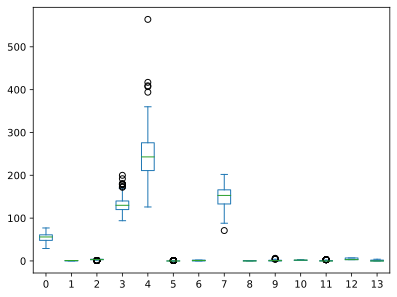

In [1712]:
data.plot(kind='box')

In [1713]:
data.duplicated().sum()

0

In [1714]:
dataNorm=data.drop([13,1,5,8],axis=1)
dataNorm=dataNorm.apply(stats.zscore)
for c in dataNorm:
    data[c]=dataNorm[c]

In [1715]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,297.000000,297.000000,2.970000e+02,2.970000e+02,2.970000e+02,297.000000
mean,-1.226105e-16,0.676768,-4.037175e-17,4.904420e-16,-1.958777e-16,0.144781,4.784800e-17,4.784800e-16,0.326599,0.000000,-1.136390e-16,-7.775299e-17,-1.196200e-16,0.946128
std,1.001688e+00,0.468500,1.001688e+00,1.001688e+00,1.001688e+00,0.352474,1.001688e+00,1.001688e+00,0.469761,1.001688,1.001688e+00,1.001688e+00,1.001688e+00,1.234551
min,-2.827176e+00,0.000000,-2.240629e+00,-2.125634e+00,-2.337704e+00,0.000000,-1.003419e+00,-3.431849e+00,0.000000,-0.906712,-9.765832e-01,-7.219761e-01,-8.942201e-01,0.000000
25%,-7.241238e-01,0.000000,-1.642895e-01,-6.594306e-01,-7.002541e-01,0.000000,-1.003419e+00,-7.247694e-01,0.000000,-0.906712,-9.765832e-01,-7.219761e-01,-8.942201e-01,0.000000
50%,1.613719e-01,1.000000,-1.642895e-01,-9.550637e-02,-8.380217e-02,0.000000,3.389928e-03,1.484822e-01,0.000000,-0.219520,6.437811e-01,-7.219761e-01,-8.942201e-01,0.000000
75%,7.148067e-01,1.000000,8.738802e-01,4.684179e-01,5.519138e-01,0.000000,1.010199e+00,7.160957e-01,1.000000,0.467672,6.437811e-01,3.448244e-01,1.172577e+00,2.000000
max,2.485798e+00,1.000000,8.738802e-01,3.851964e+00,6.099981e+00,1.000000,1.010199e+00,2.287949e+00,1.000000,4.419026,2.264145e+00,2.478425e+00,1.172577e+00,4.000000


<Axes: >

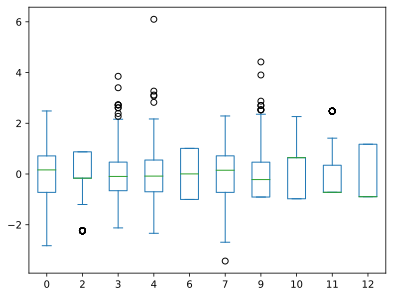

In [1716]:
dataNorm.plot(kind='box')

In [1717]:
data[13][data[13]>0] =1

<ipython-input-1717-5fc5951bdc58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[13][data[13]>0] =1


In [1718]:
data[13].value_counts()

0    160
1    137
Name: 13, dtype: int64

In [1719]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data.drop(13,axis=1).values, data[13].values, test_size=50,random_state=42)


In [1720]:
# convert from pandas dataframe to tensor
train_data  = torch.tensor( train_data ).float()
test_data = torch.tensor(test_data ).float()
train_labels = torch.tensor( train_labels ).float()
test_labels = torch.tensor( test_labels ).float()

In [1721]:
train_labels.shape

torch.Size([247])

In [1722]:
train_labels=train_labels.reshape(247,1)

In [1723]:
test_labels=test_labels.reshape(50,1)

In [1724]:


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [1725]:
# create a class for the model WITH BATCH NORM

class fNN(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(13,32)

    ### hidden layers
    self.fc1    = nn.Linear(32,10)
    self.bnorm1 = nn.BatchNorm1d(32) # the number of units into this layer
    self.fc2    = nn.Linear(10,32)
    self.bnorm2 = nn.BatchNorm1d(10) # the number of units into this layer
    self.fc3    = nn.Linear(32,32)
    self.bnorm3 = nn.BatchNorm1d(32) # the number of units into this layer
    self.fc4    = nn.Linear(32,32)
    self.bnorm4 = nn.BatchNorm1d(32) # the number of units into this layer
    self.fc5    = nn.Linear(32,10)
    self.bnorm5 = nn.BatchNorm1d(32) # the number of units into this layer


    ### output layer
    self.output = nn.Linear(10,1)

  # forward pass
  def forward(self,x):

      # input (x starts off normalized)
      x = F.relu( self.input(x) )


      # hidden layer 1
      x = self.bnorm1(x) # batchnorm
      x = self.fc1(x)    # weighted combination
      x = F.relu(x)      # activation function

      # hidden layer 2
      x = self.bnorm2(x) # batchnorm
      x = self.fc2(x)    # weighted combination
      x = F.relu(x)      # activation function

      # hidden layer 3
      x = self.bnorm3(x) # batchnorm
      x = self.fc3(x)    # weighted combination
      x = F.relu(x)      # activation function

      # hidden layer 4
      x = self.bnorm4(x) # batchnorm
      x = self.fc4(x)    # weighted combination
      x = F.relu(x)      # activation function

      # hidden layer 5
      x = self.bnorm5(x) # batchnorm
      x = self.fc5(x)    # weighted combination
      x = F.relu(x)      # activation function




      # output layer
      return self.output(x)

In [1726]:
net = fNN()
 #change the weights (leave biases as Kaiming [default])
for module in net.modules():
  if isinstance(module, nn.Linear):
      nn.init.xavier_uniform_(module.weight)

In [1727]:
# a function that trains the model

# global parameter
numepochs = 1000

def trainTheModel():

  # loss function and optimizer
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(net.parameters(),lr=.0001,weight_decay=0.0001)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    net.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)

      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)



    ### test accuracy

    # NOTE: batch normalization should be turned off during testing, so we definitely need to switch modes here
    net.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
    testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )

  # function output
  return trainAcc,testAcc,losses

In [1728]:
# create and train a model WITH BATCHNORM
net = fNN()
trainAccWith,testAccWith,lossesWith = trainTheModel()

In [1732]:
print(f'best model test accuracy: {max(testAccWith):.2f}%')

best model test accuracy: 98.00%


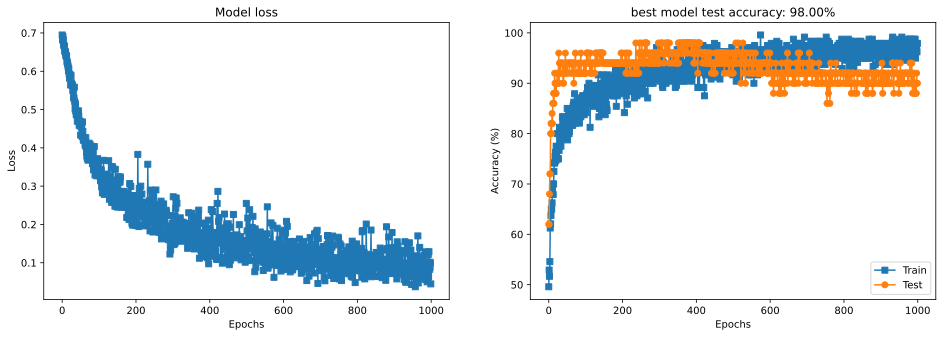

In [1731]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(lossesWith,'s-',label='Train')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(trainAccWith,'s-',label='Train')
ax[1].plot(testAccWith,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'best model test accuracy: {max(testAccWith):.2f}%')
ax[1].legend()


plt.show()